In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 4.16M/4.16M [00:00<00:00, 21.0MB/s]

Extracting files...


Path to dataset files: /Users/kirsten/.cache/kagglehub/datasets/shubhambathwal/flight-price-prediction/versions/2


In [23]:
import pandas as pd

# Load data
df = pd.read_csv('/Users/kirsten/.cache/kagglehub/datasets/shubhambathwal/flight-price-prediction/versions/2/Clean_Dataset.csv')

In [24]:
# Explore dataset
df.shape

(300153, 12)

In [25]:
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
airline,SpiceJet,SpiceJet,AirAsia,Vistara,Vistara
flight,SG-8709,SG-8157,I5-764,UK-995,UK-963
source_city,Delhi,Delhi,Delhi,Delhi,Delhi
departure_time,Evening,Early_Morning,Early_Morning,Morning,Morning
stops,zero,zero,zero,zero,zero
arrival_time,Night,Morning,Early_Morning,Afternoon,Morning
destination_city,Mumbai,Mumbai,Mumbai,Mumbai,Mumbai
class,Economy,Economy,Economy,Economy,Economy
duration,2.17,2.33,2.17,2.25,2.33


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [27]:
# Drop customer ID and flight as index variable are not needed and will interfere with model training

df = df.drop(['Unnamed: 0', 'flight'], axis = 1)
df.shape

(300153, 10)

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [29]:
# Explore values of Categorical Variables

num_vars = ['duration', 'days_left', 'price']
df_cat = df.drop(num_vars, axis = 1)
for col in list(df_cat):
  print("\n", df_cat[col].value_counts(dropna=False).to_string())


 airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011

 source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700

 departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306

 stops
one            250863
zero            36004
two_or_more     13286

 arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001

 destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368

 class
Economy     206666
Business     93487


In [31]:
# Use One Hot Encoding to turn categorical variables into dummy variables: 

df_encoded = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 
                                              'destination_city', 'class']).astype(int)

df_encoded.describe()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,11.778783,26.004751,20889.660523,0.053633,0.269503,0.077204,0.143660,0.030021,0.425979,0.173448,...,0.209010,0.304971,0.170140,0.134491,0.191103,0.142347,0.165029,0.196890,0.311464,0.688536
std,7.198430,13.561004,22697.767366,0.225292,0.443702,0.266915,0.350745,0.170646,0.494491,0.378635,...,0.406602,0.460396,0.375756,0.341180,0.393170,0.349407,0.371207,0.397649,0.463093,0.463093
min,0.000000,1.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,15.000000,4783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,26.000000,7425.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,38.000000,42521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,49.000000,49.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


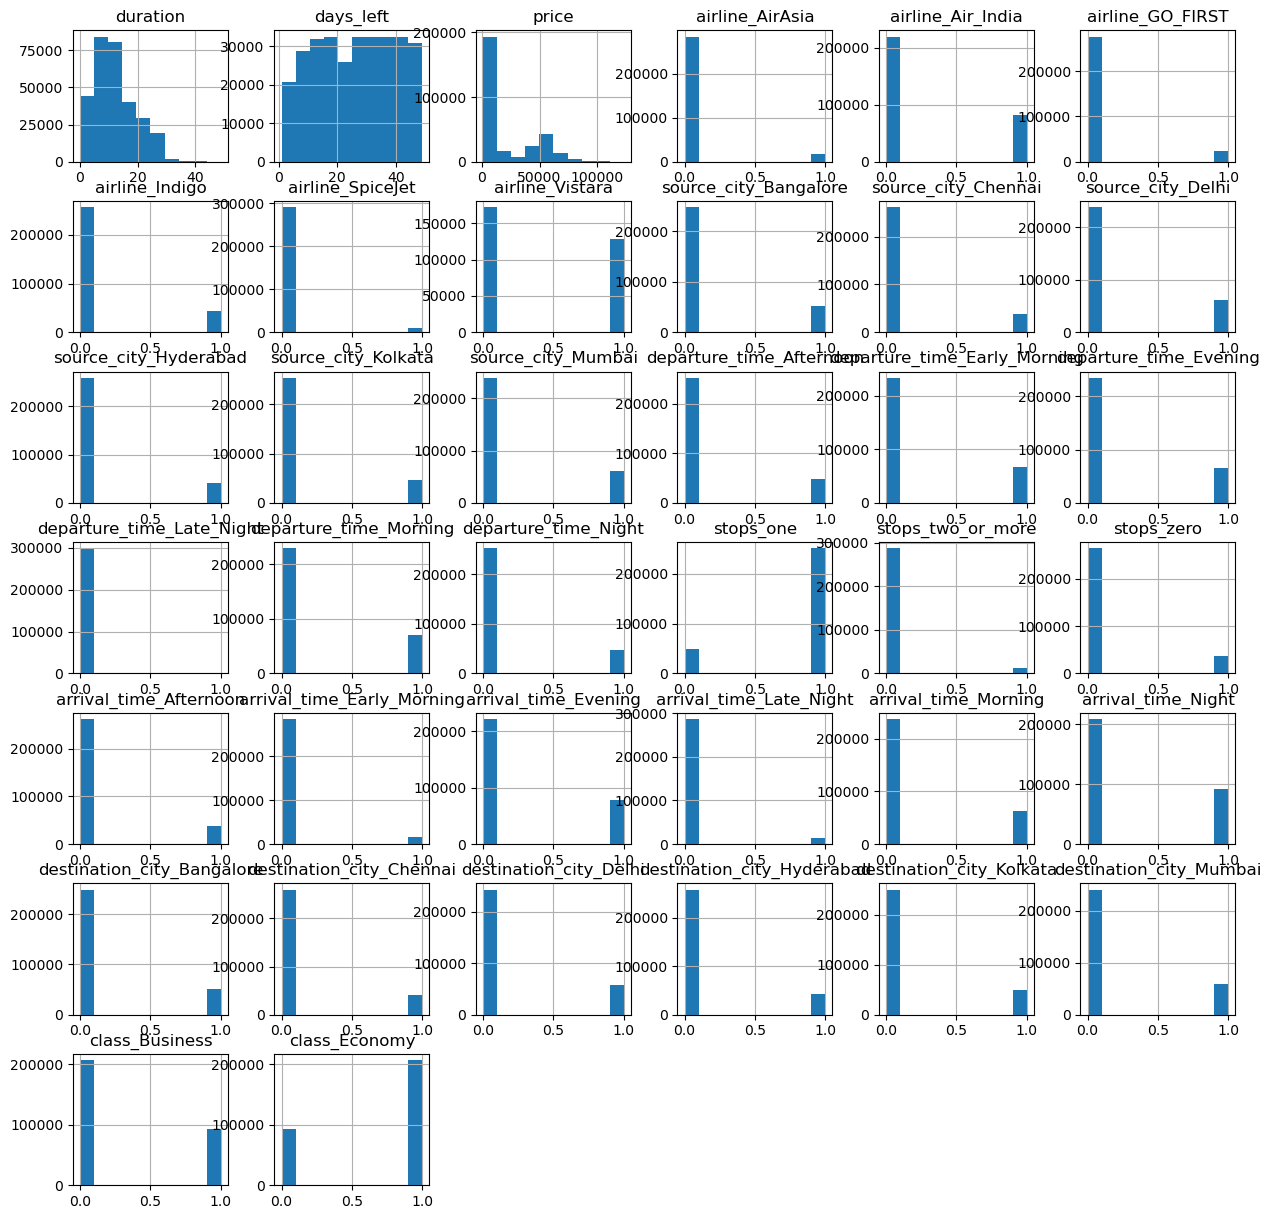

In [33]:
# histograms to show numeric variables distributions
df_encoded.hist(bins=10, figsize=(15, 15));

In [40]:
df_encoded.corr()['price'].sort_values(ascending = False)

price                           1.000000
class_Business                  0.937860
airline_Vistara                 0.360816
duration                        0.205079
stops_one                       0.199913
airline_Air_India               0.070041
arrival_time_Evening            0.056408
departure_time_Night            0.041768
arrival_time_Morning            0.030379
destination_city_Kolkata        0.020956
arrival_time_Night              0.020344
source_city_Chennai             0.018742
destination_city_Chennai        0.018473
departure_time_Morning          0.018199
source_city_Kolkata             0.016127
destination_city_Bangalore      0.014050
source_city_Mumbai              0.013206
source_city_Bangalore           0.011702
destination_city_Mumbai         0.010533
departure_time_Evening          0.007946
destination_city_Hyderabad     -0.008292
departure_time_Early_Morning   -0.012232
source_city_Hyderabad          -0.012828
departure_time_Late_Night      -0.033768
arrival_time_Aft

According to the correlation table above, class, airline, duration, and stops are most heavily correlated with price. Therefore, to simplify our model, let's create a filtered dataset with only those features.

In [44]:
columns_to_keep = ['class', 'airline', 'duration', 'stops', 'price']
df_filtered = df[columns_to_keep]
df_filtered.head()

,class,airline,duration,stops,price
0,Economy,SpiceJet,2.17,zero,5953
1,Economy,SpiceJet,2.33,zero,5953
2,Economy,AirAsia,2.17,zero,5956
3,Economy,Vistara,2.25,zero,5955
4,Economy,Vistara,2.33,zero,5955


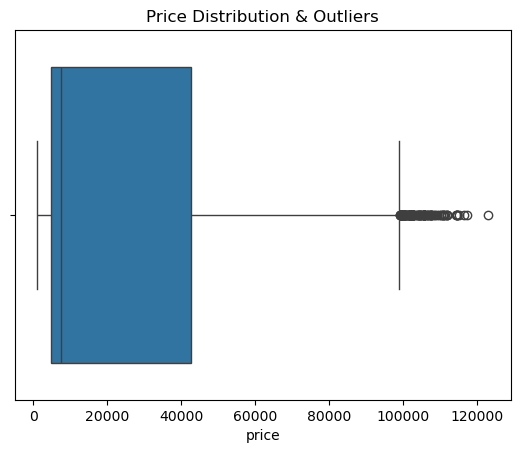

In [37]:
#Investigate distribution of price a bit more

import seaborn as sns

sns.boxplot(x=df['price'])
plt.title('Price Distribution & Outliers')
plt.show()

In [60]:
# Remove Outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_filtered[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Number of records including price outliers: ", len(df_filtered))
print("Number of records after outliers removed: ", len(df_cleaned))

Number of records including price outliers:  300153
Number of records after outliers removed:  300030


In [56]:
df_cleaned.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
class,Economy,Economy,Economy,Economy,Economy,Economy,Economy,Economy,Economy,Economy
airline,SpiceJet,SpiceJet,AirAsia,Vistara,Vistara,Vistara,Vistara,Vistara,GO_FIRST,GO_FIRST
duration,2.17,2.33,2.17,2.25,2.33,2.33,2.08,2.17,2.17,2.25
stops,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
price,5953,5953,5956,5955,5955,5955,6060,6060,5954,5954


In [61]:
# Transform categorical variables to numeric labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_cleaned['airline'] = label_encoder.fit_transform(df_cleaned['airline'])

df_cleaned['class'] = df_cleaned['class'].map({'Economy': 0, 'Business': 1})
df_cleaned['stops'] = df_cleaned['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

# Ensure the columns are recognized as integers
df_cleaned['class'] = df_cleaned['class'].astype(int)
df_cleaned['stops'] = df_cleaned['stops'].astype(int)

# Check the column types to verify
print(df_cleaned.dtypes)

class         int64
airline       int64
duration    float64
stops         int64
price         int64
dtype: object


/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_81099/94490954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['airline'] = label_encoder.fit_transform(df_cleaned['airline'])
/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_81099/94490954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['class'] = df_cleaned['class'].map({'Economy': 0, 'Business': 1})
/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_81099/94490954.py:10: SettingWithCopyWarning: 
A 

In [62]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,300030.0,0.311182,0.462978,0.00,0.00,0.00,1.00,1.00
airline,300030.0,3.104096,1.833239,0.00,1.00,3.00,5.00,5.00
duration,300030.0,12.220126,7.192515,0.83,6.83,11.25,16.17,49.83
stops,300030.0,0.924188,0.398049,0.00,1.00,1.00,1.00,2.00
price,300030.0,20855.326674,22638.775853,1105.00,4783.00,7425.00,42521.00,98972.00


In [63]:
# Split Dataset into Features and Target Sets

X = df_cleaned.drop(columns = ['price'])
y = df_cleaned['price'].values


# Split Dataset into Train/Test Splits

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 88)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (240024, 4)
y_train.shape:  (240024,)
X_test.shape:  (60006, 4)
y_test.shape:  (60006,)


In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=10,  # Number of random combinations to try
                                   cv=3, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, verbose=1, random_state=88)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score (MSE): {random_search.best_score_}")

# Evaluate the model performance on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'squared_error'}
Best Cross-Validation Score (MSE): -28771313.455982048
Mean Squared Error on Test Set: 28742645.925508842


In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 3522.9016062697656
Root Mean Squared Error: 5361.216832539871


In [68]:
# Save Model as a Pickle (.pkl) File

import joblib
joblib.dump(best_model, 'flight_price_model.pkl')

['flight_price_model.pkl']

In [69]:
# Save the cleaned and filtered DataFrame to a CSV file
df_cleaned.to_csv('flight_price.csv', index=False)

In [72]:
df_cleaned['airline'].value_counts(dropna=False)

airline
5    127736
1     80892
3     43120
2     23173
0     16098
4      9011
Name: count, dtype: int64

Airline Encoding
Vistara (5)      
Air_India (1)    
Indigo  (3)     
GO_FIRST  (2)   
AirAsia  (0)    
SpiceJet (4)     